# Лабораторная работа №3. Синтез БИХ-фильтров




In [49]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import signal

## Модуль 1. Метод размещения нулей и полюсов.


### Задача 1.1 Синтез цифрового резонатора

| Варианты: |   $1$ |    $2$ |    $3$ |    $4$ |    $5$ |    $6$ |     $7$ |    $8$ |    $9$ |    $10$ | 
|:---------:|----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|
|  $\nu_0$  | $0.25$ | $0.2$ | $0.1$ |  $—$ | $—$ | $—$ | $0.3$ | $0.15$ | $0.35$ | $0.4$ |
|$\theta_0$ | $—$ | $—$ | $—$ | $\dfrac\pi6$ | $\dfrac\pi3$ | $\dfrac\pi2$ |  $—$ | $—$ | $—$ | $—$ |

Синтезировать методом размещения нулей и полюсов цифровой резонатор для частоты $\nu_0$ или $\theta_0$ (в зависимости от варианта). Параметр, влияющий на добротность резонатора, подобрать самостоятельно.

* Построить нуль-полюсную диаграмму получившегося фильтра.
* Записать передаточную функцию $H(z)$.
* Вычислить аналитически импульсную и переходную характеристики и сравнить с результатами моделирования.
* Исследовать фильтр на устойчивость по входу.
* Изобразить блок-схему фильтра.
* Построить АЧХ и ФЧХ фильтра.
* Сравнить АЧХ с $H(z)$.

In [50]:
theta_0 = np.pi / 6
f_0 = theta_0 / (np.pi * 2)

beta, alpha = signal.iirpeak(f_0, Q=10, fs=1)
dlti_rs = signal.dlti(beta, alpha, dt=0.1)
w, H = signal.dfreqresp(dlti_rs, w=2 * np.pi * np.linspace(-0.5, 0.5, 1024))
print(f"{beta = }\n{alpha = }")

from IPython.display import display, Latex
def latex_elem(elem, power, last=False) -> str:
  res = ""
  if elem != 0.0:
    res = f"\\left({elem}\\right)"
    if power != 0:
      res += f"\\cdot z^{{{power}}}"
    if not last:
      res += " + "
  return res

display(Latex(f"""\
$$
H\\left(z\\right) =
\\dfrac{{
  {"".join(latex_elem(b, -i, i == 2) for i, b in enumerate(beta))}
}}{{
  {"".join(latex_elem(a, -i, i == 2) for i, a in enumerate(alpha))}
}}
$$"""))

beta = array([ 0.02551772,  0.        , -0.02551772])
alpha = array([ 1.        , -1.68785283,  0.94896457])


<IPython.core.display.Latex object>

(array([-1.,  1.]), array([ 29.96594067, -29.96594067]))

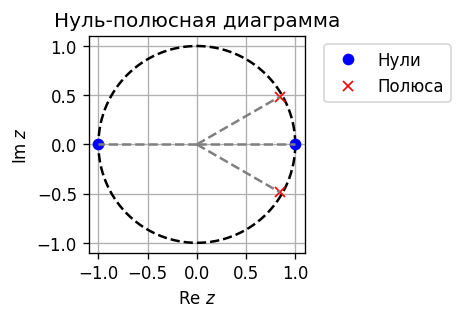

In [51]:
z, p, k = signal.tf2zpk(beta, alpha)

plt.figure(figsize=[4, 4], dpi=120)
# unit circle
t = np.linspace(0, 2 * np.pi, 401)
plt.plot(np.cos(t), np.sin(t), "k--")

plt.plot(z.real, z.imag, "bo", label="Нули")
plt.plot(p.real, p.imag, "rx", label="Полюса")

for u in z:
    plt.plot([0, u.real], [0, u.imag], "--", color="gray")

for u in p:
    plt.plot([0, u.real], [0, u.imag], "--", color="gray")

plt.yticks(np.linspace(-1, 1, 5))
plt.xticks(np.linspace(-1, 1, 5))

plt.grid()
plt.axis("image")
plt.axis([-1.1, 1.1, -1.1, 1.1])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, numpoints=1)
plt.title("Нуль-полюсная диаграмма")

plt.xlabel("Re $z$")
plt.ylabel("Im $z$")

plt.tight_layout()
z, np.angle(p, deg=True)

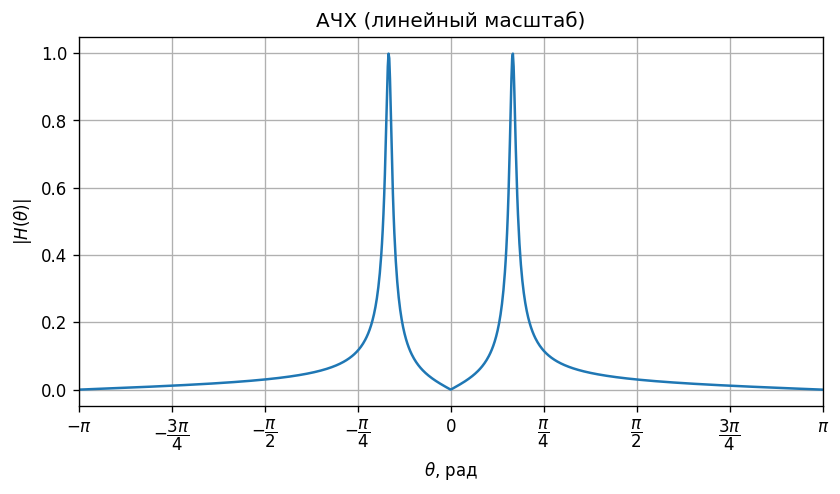

In [52]:
plt.figure(figsize=[8, 4], dpi=120)
plt.plot(w, abs(H))
plt.xlabel("$\\theta$, рад")
plt.ylabel("$|H(\\theta)|$")
plt.title("АЧХ (линейный масштаб)")
plt.xlim([-np.pi, np.pi])
plt.xticks([-np.pi, np.pi])

str1 = [
    "$-\\pi$",
    "$-\dfrac{3\\pi}{4}$",
    "$-\dfrac{\\pi}{2}$",
    "$-\dfrac{\\pi}{4}$",
    "$0$",
    "$\dfrac{\\pi}{4}$",
    "$\dfrac{\\pi}{2}$",
    "$\dfrac{3\\pi}{4}$",
    "$\\pi$",
]
plt.xticks(2 * np.pi * np.linspace(-0.5, 0.5, 9), labels=str1)
plt.grid()

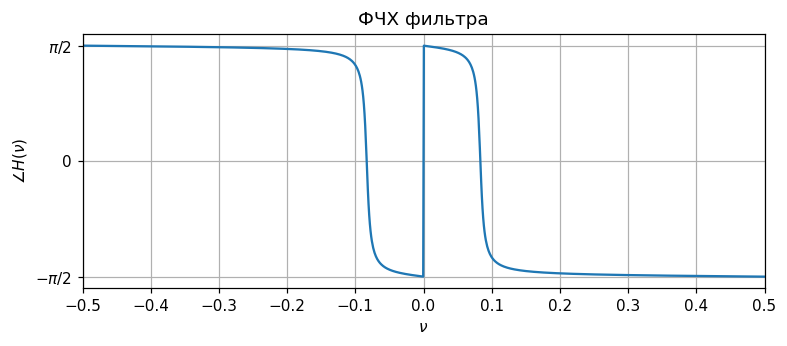

In [53]:
theta = np.linspace(-np.pi, np.pi, 1024)
plt.figure(figsize=[8, 3], dpi=110)
plt.plot(theta / (2 * np.pi), np.angle(H))
plt.xlabel("$\\nu$")
plt.ylabel("$\\angle H(\\nu)$")
plt.title("ФЧХ фильтра")
plt.xlim([-0.5, 0.5])
plt.xticks(np.linspace(-0.5, 0.5, 11))
plt.yticks([-np.pi / 2, 0, np.pi / 2], labels=("$-\\pi/2$", "0", "$\\pi/2$"))

plt.grid()
plt.show()

In [54]:
t, y = signal.dstep(dlti_rs, n=25)
y

(array([[ 0.02551772],
        [ 0.06858787],
        [ 0.09155082],
        [ 0.08943685],
        [ 0.06407776],
        [ 0.02328142],
        [-0.02151191],
        [-0.05840218],
        [-0.07816024],
        [-0.07650139],
        [-0.05495179],
        [-0.02015342],
        [ 0.01813129],
        [ 0.04972783],
        [ 0.06672731],
        [ 0.06543593],
        [ 0.04712436],
        [ 0.01744261],
        [-0.01527879],
        [-0.04234077],
        [-0.05696595],
        [-0.05597026],
        [-0.04041089],
        [-0.01509384],
        [ 0.01287232]]),)

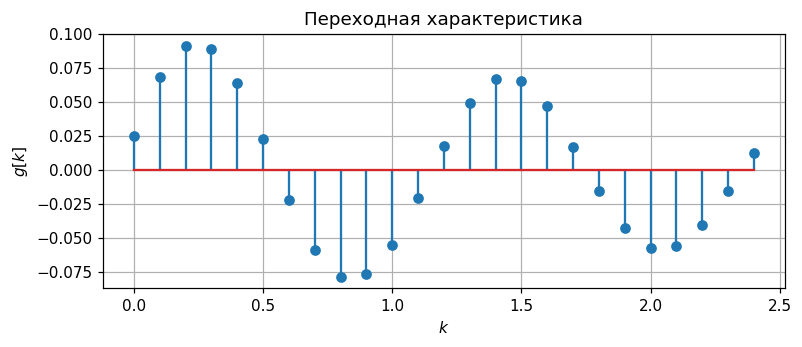

In [55]:
plt.figure(figsize=[8, 3], dpi=110)
plt.stem(t, np.squeeze(y))
plt.xlabel("$k$")
plt.ylabel("$g[k]$")
plt.title("Переходная характеристика")
plt.grid()
plt.show()

### Задача 1.2 Синтез цифрового фильтра Hum removal

| Варианты: |   1 |    2 |    3 |    4 |    5 |    6 |    7 |    8 |    9 |   10 |  
|:---------:|----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|
|  $f_0$, Гц  | 250 | 350 | 400 |  200 | 100 | 150 | 250 | 500| 600 | 350 |
|  $f_д$, Гц | 1000 | 1000 | 1000 | 500 | 500 | 500 | 1000 | 2000 | 2000 | 2000 |

Синтезировать методом размещения нулей и полюсов цифровой фильтр Hum removal  для частоты $f_{0}$, $f_{д}$. Параметр, влияющий на добротность, подобрать самостоятельно.

* Записать передаточную функцию $H(z)$.
* Исследовать фильтр на устойчивость по входу.
* Изобразить блок-схему фильтра.
* Построить АЧХ и ФЧХ фильтра.
* Сравнить АЧХ с $H(z)$.


## Модуль 2. Метод билинейного *z*-преобразования

### Задача 2.1 Синтез фильтра нижних частот (ФНЧ)

| Варианты: |   1 |    2 |    3 |    4 |    5 |    6 |    7 |    8 |    9 |    10 | 
|:---------:|----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|
|  $f_д$, Гц  | 6000 | 6200 | 6400 |  6600 | 6800 | 7000 | 6200 | 6400 |  6600 | 6800 |
|  $f_1$, Гц | 800 | 860 | 920 | 980 | 1040 | 1100 | 860 | 920 | 980 | 1040 |
|  $f_2$, Гц | 1100 | 1170 | 1240 | 1310 | 1380 | 1450 |1170 | 1240 | 1310 | 1380 |
|  $a_\max$, дБ | 0.4455 | 0.4455 | 0.4455 | 0.4455 | 0.4455 | 0.4455 |0.4455 | 0.4455 | 0.4455 | 0.4455 |
|  $a_\min$, дБ | 40 | 40 | 40 | 40 | 40 | 40 |40 | 40 | 40 | 40 |

 Получить коэффициенты разностного уравнения БИХ-фильтра нижних частот со следующими характеристиками:
* частота дискретизации $f_{д}$, 
* граничная частота полосы пропускания $f_1$,
* граничная частота полосы задерживания $f_2$,
* максимальное допустимое затухание в полосе пропускания $a_\max$,
* минимальное допустимое затухание в полосе задерживания $a_\min$.

Воспользоваться методом билинейного z-преобразования для фильтров: 

1) Баттервота,

2) Чебышёва 1 рода,

3) Чебышёва 2 рода,

4) Золотарёва—Кауэра.

Из четырех получившихся результатов выбрать фильтр, обладающий наименьшим порядком $N$ и построить схему его реализации в виде каскада биквадратных блоков. Для биквадратных блоков выбрать прямую каноническую реализацию. 


### Задача 2.2 Синтез аналога двухкаскадного RC-фильтра (I способ)

Построить БИХ фильтр, эквивалентный двум последовательно соединенным RC-цепочкам интегрирующего типа (соединённым через развязывающий усилитель), воспользовавшись методом билинейного *z*-преобразования.

Параметры $RC$ и $\Delta t $ выбрать самостоятельно. 
Сравнить частотные и импульсные характеристики  цифровых фильтров и их аналоговых прототипов. 

## Модуль 3. Метод инвариантной импульсной характеристики.

### Задача 3.1 Синтез аналога двухкаскадного RC-фильтра (II способ)

Построить БИХ фильтр, эквивалентный двум последовательно соединенным RC-цепочкам интегрирующего типа (соединённым через развязывающий усилитель), воспользовавшись методом инвариантной импульсной характеристики.

Параметры $RC$ и $\Delta t $ выбрать самостоятельно. 
Сравнить частотные и импульсные характеристики  цифровых фильтров и их аналоговых прототипов. 

### Задача 3.2 Цифровая фильтрация реальных сигналов (творческая задача)

Выполнить фильтрацию `.wav` файла с помощью одного из цифровых фильтров, рассмотренных в первой и второй лабораторной работах. Проиллюстрировать, как в результате фильтрации изменился сигнал. Привести пример, для чего выбранный фильтр может быть применен. 

Для этой задачи `.wav` файл можно загрузить, например, с сайта [freesound.org](https://freesound.org/) или взять из предыдущих лабораторных работ.